<a href="/assets/tutorial05_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial05/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 5 - K-NN and Desicion Trees
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## Ex 5.1

In [ ]:
dataset = pd.DataFrame([
    [8, 1, -1],
    [10, 2, -1],
    [5, 5, 1],
    [7, 3, 1],
    [7, 4, -1],
    [10, 4, -1],
    [11, 4, -1],
    [7, 5, 1],
], columns=['Radius', 'Echo', 'Sweetness'])

display(HTML(dataset.to_html()))

,Radius,Echo,Sweetness
0,8,1,-1
1,10,2,-1
2,5,5,1
3,7,3,1
4,7,4,-1
5,10,4,-1
6,11,4,-1
7,7,5,1


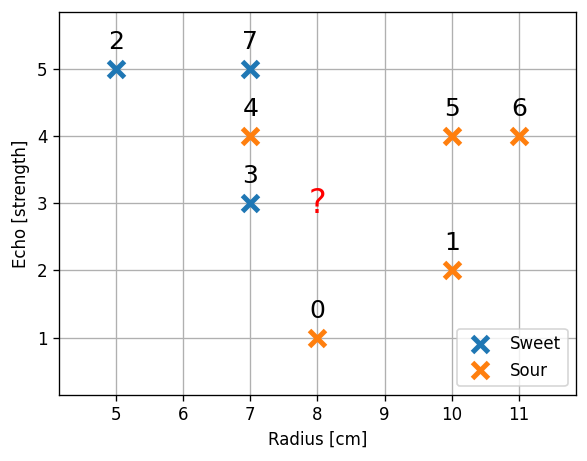

In [ ]:
pos_indx = dataset['Sweetness'].values == 1
neg_indx = dataset['Sweetness'].values == -1


## Ploting
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(dataset['Radius'][pos_indx], dataset['Echo'][pos_indx], 'x', ms=10, mew=3, label=f'Sweet')
ax.plot(dataset['Radius'][neg_indx], dataset['Echo'][neg_indx], 'x', ms=10, mew=3, label=f'Sour')
ax.axis('equal')
for i in range(len(dataset)):
    ax.text(dataset['Radius'][i], dataset['Echo'][i] + 0.3, f'{i}', fontsize=15, ha='center')
    
ax.text(8, 3, '?', fontsize=20, color='red', va='center', ha='center')
ax.set_xlabel('Radius [cm]')
ax.set_ylabel('Echo [strength]')
ax.legend(loc='lower right')
ax.set_xlim(4, 12)
ax.set_ylim(0, 6)
plt.tight_layout()
fig.savefig('./output/ex_5_1_dataset.png')

In [ ]:
def h(dataset, x, k):
    x_train = dataset[['Echo', 'Radius']].values
    dists = ((x_train - x[None, :]) ** 2).sum(axis=1)
    nn = np.argsort(dists)[:k]
    nn_dists = dists[nn]
    nn = dataset.index[nn].values
    nn_labels = dataset['Sweetness'].loc[nn]
    unique, unique_counts = np.unique(nn_labels, return_counts=True)
    y_hat = unique[np.argmax(unique_counts)]
    
    return y_hat, nn

point,Correct label,K=1 prediction,K=3 prediction,K=5 prediction,K=7 prediction
0,-1,✓ -1 (nn=[1]),✓ -1 (nn=[1 3 4]),✓ -1 (nn=[1 3 4 5 7]),✓ -1 (nn=[1 3 4 5 7 6 2])
1,-1,✓ -1 (nn=[5]),✓ -1 (nn=[5 0 6]),✓ -1 (nn=[5 0 6 3 4]),✓ -1 (nn=[5 0 6 3 4 7 2])
2,1,✓ 1 (nn=[7]),✓ 1 (nn=[7 4 3]),✗ -1 (nn=[7 4 3 0 5]),✗ -1 (nn=[7 4 3 0 5 1 6])
3,1,✗ -1 (nn=[4]),✗ -1 (nn=[4 7 0]),✗ -1 (nn=[4 7 0 2 1]),✗ -1 (nn=[4 7 0 2 1 5 6])
4,-1,✗ 1 (nn=[3]),✗ 1 (nn=[3 7 2]),✗ 1 (nn=[3 7 2 5 0]),✓ -1 (nn=[3 7 2 5 0 1 6])
5,-1,✓ -1 (nn=[6]),✓ -1 (nn=[6 1 4]),✓ -1 (nn=[6 1 4 3 7]),✓ -1 (nn=[6 1 4 3 7 0 2])
6,-1,✓ -1 (nn=[5]),✓ -1 (nn=[5 1 4]),✓ -1 (nn=[5 1 4 3 7]),✓ -1 (nn=[5 1 4 3 7 0 2])
7,1,✗ -1 (nn=[4]),✓ 1 (nn=[4 2 3]),✗ -1 (nn=[4 2 3 5 0]),✗ -1 (nn=[4 2 3 5 0 6 1])
Avg. score,,3/8,2/8,4/8,3/8


Text(0, 0.5, 'Misclassification')

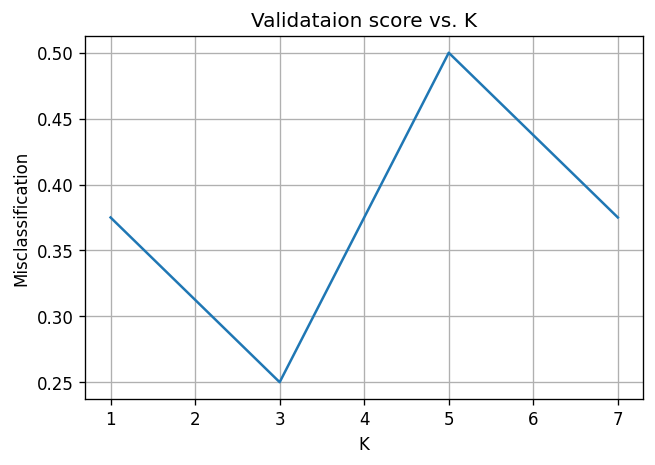

In [ ]:
k_list = (1, 3, 5, 7)

results = []
results.append(list(dataset.index))
results.append(list(dataset['Sweetness']))
results_headers = ['point', 'Correct label']

val_scores = {}
nn_table = []
for k in k_list:
    results_headers.append(f'K={k} prediction')
    results.append([])
    
    folds_score = []
    for fold in range(len(dataset)):
        indices_train = np.ones(len(dataset), dtype=bool)
        indices_train[fold] = False
        y_hat, nn = h(dataset.loc[indices_train], dataset[['Echo', 'Radius']].loc[fold].values , k)
        val_score = int(y_hat != dataset['Sweetness'].iloc[fold])
        folds_score.append(val_score)
        results[-1].append(('✗' if val_score else '✓') + f' {y_hat} (nn={nn})')
    val_scores[k] = np.mean(folds_score)

results = list(zip(*results))
results.append(['Avg. score', ''] + [f'{int(val_scores[k] * len(dataset))}/{len(dataset)}' for k in k_list])
display(HTML(tabulate.tabulate(results, results_headers, tablefmt="html")))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, [val_scores[k] for k in k_list])
ax.set_title('Validataion score vs. K')
ax.set_xlabel('K')
ax.set_ylabel('Misclassification')
# fig.savefig('./output/drive_prediction_selecting_order.png', dpi=240)

## Ex 5.2

In [ ]:
node_style = {
    'style': 'filled',
    'fillcolor': '#DAE8FC',
    'color': '#6C8EBF',
    'penwidth': '3'
    }
edge_style = {
    'penwidth': '2'
    }

current_node_style = node_style.copy()
current_node_style.update({
    'fillcolor': '#D5E8D4',
    'color': '#82B366',
    })

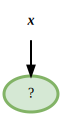

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '?', **current_node_style)
tree.edge('root', 'node_1', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1')
tree

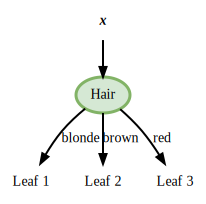

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **current_node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('leaf_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1', 'leaf_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Leaf 3', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_hair')
tree

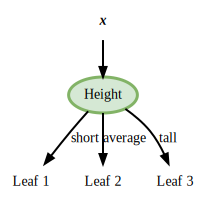

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Height', **current_node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('leaf_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1', 'leaf_1_1', 'short', **edge_style)
tree.node('leaf_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'average', **edge_style)
tree.node('leaf_1_3', 'Leaf 3', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'tall', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_height')
tree

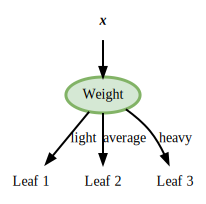

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Weight', **current_node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('leaf_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1', 'leaf_1_1', 'light', **edge_style)
tree.node('leaf_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'average', **edge_style)
tree.node('leaf_1_3', 'Leaf 3', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'heavy', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_weight')
tree

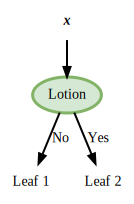

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Lotion', **current_node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('leaf_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1', 'leaf_1_1', 'No', **edge_style)
tree.node('leaf_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'Yes', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_lotion')
tree

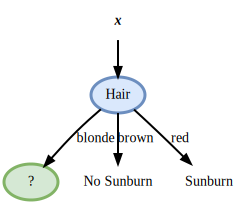

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', '?', **current_node_style)
tree.edge('node_1', 'node_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_1')
tree

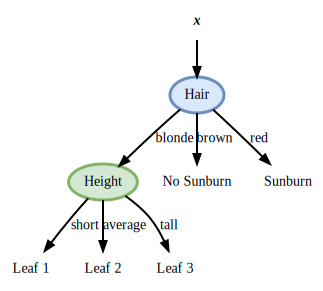

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', 'Height', **current_node_style)
tree.edge('node_1', 'node_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.node('leaf_1_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_1', 'short', **edge_style)
tree.node('leaf_1_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', 'average', **edge_style)
tree.node('leaf_1_1_3', 'Leaf 3', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_3', 'tall', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_1_height')
tree

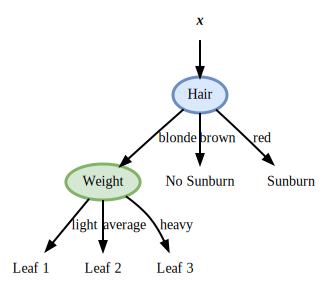

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', 'Weight', **current_node_style)
tree.edge('node_1', 'node_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.node('leaf_1_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_1', 'light', **edge_style)
tree.node('leaf_1_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', 'average', **edge_style)
tree.node('leaf_1_1_3', 'Leaf 3', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_3', 'heavy', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_1_weight')
tree

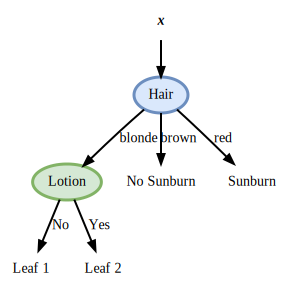

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', 'Lotion', **current_node_style)
tree.edge('node_1', 'node_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.node('leaf_1_1_1', 'Leaf 1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_1', 'No', **edge_style)
tree.node('leaf_1_1_2', 'Leaf 2', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', 'Yes', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_node_1_1_lotion')
tree

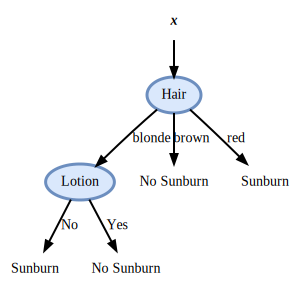

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', 'Hair', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', 'Lotion', **node_style)
tree.edge('node_1', 'node_1_1', 'blonde', **edge_style)
tree.node('leaf_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', 'brown', **edge_style)
tree.node('leaf_1_3', 'Sunburn', shape='plaintext')
tree.edge('node_1', 'leaf_1_3', 'red', **edge_style)

tree.node('leaf_1_1_1', 'Sunburn', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_1', 'No', **edge_style)
tree.node('leaf_1_1_2', 'No Sunburn', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', 'Yes', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_2_final')
tree

## Ex 5.3

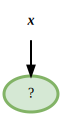

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '?', **current_node_style)
tree.edge('root', 'node_1', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_3_node_1')
tree

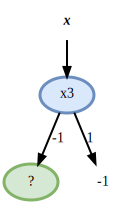

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '<x<SUB>3</SUB>>', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', '?', **current_node_style)
tree.edge('node_1', 'node_1_1', '-1', **edge_style)
tree.node('leaf_1_2', '-1', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', '1', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_3_node_1_1')
tree

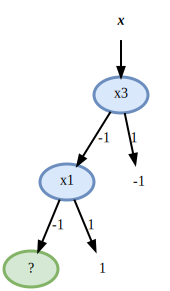

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '<x<SUB>3</SUB>>', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', '<x<SUB>1</SUB>>', **node_style)
tree.edge('node_1', 'node_1_1', '-1', **edge_style)
tree.node('leaf_1_2', '-1', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', '1', **edge_style)

tree.node('node_1_1_1', '?', **current_node_style)
tree.edge('node_1_1', 'node_1_1_1', '-1', **edge_style)
tree.node('leaf_1_1_2', '1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', '1', **edge_style)


tree.format = 'png'
tree.render('./output/ex_5_3_node_1_1_1')
tree

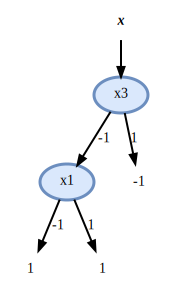

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '<x<SUB>3</SUB>>', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('node_1_1', '<x<SUB>1</SUB>>', **node_style)
tree.edge('node_1', 'node_1_1', '-1', **edge_style)
tree.node('leaf_1_2', '-1', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', '1', **edge_style)

tree.node('leaf_1_1_1', '1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_1', '-1', **edge_style)
tree.node('leaf_1_1_2', '1', shape='plaintext')
tree.edge('node_1_1', 'leaf_1_1_2', '1', **edge_style)


tree.format = 'png'
tree.render('./output/ex_5_3_final')
tree

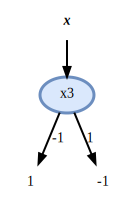

In [ ]:
tree = Digraph(comment='Tree')
tree.node('root', '<<I><B>x</B></I>>', shape='plaintext')
tree.node('node_1', '<x<SUB>3</SUB>>', **node_style)
tree.edge('root', 'node_1', **edge_style)
tree.node('leaf_1_1', '1', shape='plaintext')
tree.edge('node_1', 'leaf_1_1', '-1', **edge_style)
tree.node('leaf_1_2', '-1', shape='plaintext')
tree.edge('node_1', 'leaf_1_2', '1', **edge_style)

tree.format = 'png'
tree.render('./output/ex_5_3_final_short')
tree